In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('C:\\Users\\Hp\\OneDrive\\Documents\\GitHub\\Thoucentric\\DataSets')

In [3]:
df=pd.read_csv('crude_low.csv')
df.head()

,date,cr_low
0,2015-01-02T00:00:00.000Z,55.48
1,2015-01-05T00:00:00.000Z,52.66
2,2015-01-06T00:00:00.000Z,50.52
3,2015-01-07T00:00:00.000Z,49.66
4,2015-01-08T00:00:00.000Z,49.81


In [4]:
df.index=pd.to_datetime(df['date'], format='ISO8601')
df=df.drop(columns=['date'])
df.head()

,cr_low
date,
2015-01-02 00:00:00+00:00,55.48
2015-01-05 00:00:00+00:00,52.66
2015-01-06 00:00:00+00:00,50.52
2015-01-07 00:00:00+00:00,49.66
2015-01-08 00:00:00+00:00,49.81


In [5]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [6]:
windowsize=30
X, y= df_to_X_y(df, windowsize)
y

array([[59.08],
       [60.71],
       [60.27],
       ...,
       [83.66],
       [84.89],
       [84.84]])

In [7]:
X=X.reshape(X.shape[0], X.shape[1], -1)
X.shape, y.shape

((2300, 30, 1), (2300, 1))

In [8]:
X_train, y_train = X[:4000], y[:4000]
X_val, y_val = X[4000:4150], y[4000:4150]
X_test, y_test = X[4150:], y[4150:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2300, 30, 1), (2300, 1), (0, 30, 1), (0, 1), (0, 30, 1), (0, 1))

In [9]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [10]:
model = Sequential()
model.add(InputLayer((windowsize, X_train.shape[2]))) 
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.007), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40)

Epoch 1/40
72/72 [==============================] - 3s 15ms/step - loss: 23.9430 - root_mean_squared_error: 4.8932
Epoch 2/40
72/72 [==============================] - 1s 14ms/step - loss: 2.5038 - root_mean_squared_error: 1.5823
Epoch 3/40
72/72 [==============================] - 1s 14ms/step - loss: 2.2129 - root_mean_squared_error: 1.4876
Epoch 4/40
72/72 [==============================] - 1s 14ms/step - loss: 2.7955 - root_mean_squared_error: 1.6720
Epoch 5/40
72/72 [==============================] - 1s 14ms/step - loss: 2.4917 - root_mean_squared_error: 1.5785
Epoch 6/40
72/72 [==============================] - 1s 17ms/step - loss: 2.3064 - root_mean_squared_error: 1.5187
Epoch 7/40
72/72 [==============================] - 1s 17ms/step - loss: 2.2376 - root_mean_squared_error: 1.4959
Epoch 8/40
72/72 [==============================] - 1s 17ms/step - loss: 2.6553 - root_mean_squared_error: 1.6295
Epoch 9/40
72/72 [==============================] - 1s 17ms/step - loss: 2.4696 - root_

In [ ]:
train_predictions= model.predict(X_train).flatten()
y_train1=y_train.flatten()
train_results=pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train1})
train_results

72/72 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,54.915779,59.08
1,57.304424,60.71
2,59.050716,60.27
3,59.794273,59.25
4,59.756317,57.80
...,...,...
2295,80.278481,82.11
2296,80.359840,83.66
2297,80.513634,83.66
2298,80.610191,84.89


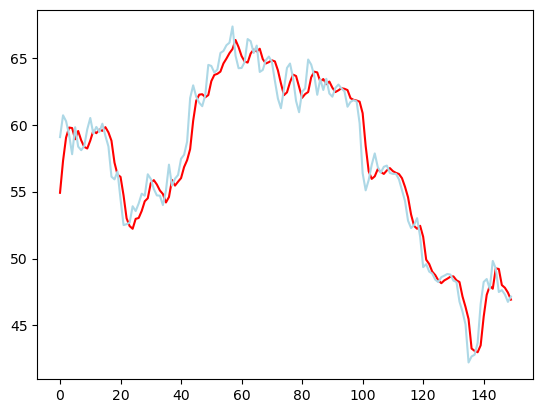

In [ ]:
plt.plot(train_results['Train Predictions'][:150], color='red')
plt.plot(train_results['Actuals'][:150], color='lightblue')